In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/justdvnsh/Data-Lit/master/regression/Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [59]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [60]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [61]:
## We convert the horsepower and price , to numeric, since they are important features ... 
## and we are trying to predict price based on horsepower
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['horsepower', 'price'], inplace=True)
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower           float64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

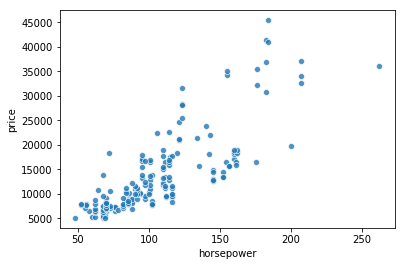

In [62]:
## Now its fine . 
## Lets plot
sns.scatterplot(df['horsepower'], df['price'], alpha=0.8)

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25)

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [0]:
# the linear regression model expects a 2d array, so we add an extra dimension with reshape
# input: [1, 2, 3], output: [ [1], [2], [3] ]
# this allows us to regress on multiple independent variables later

training_x = np.array(train['horsepower']).reshape(-1, 1)
training_y = np.array(train['price'])

In [66]:
train['horsepower'][:10]

60      84.0
112     95.0
10     101.0
37      86.0
46      90.0
64      84.0
199    162.0
150     62.0
107     97.0
200    114.0
Name: horsepower, dtype: float64

In [67]:
training_x[:10]

array([[ 84.],
       [ 95.],
       [101.],
       [ 86.],
       [ 90.],
       [ 84.],
       [162.],
       [ 62.],
       [ 97.],
       [114.]])

In [68]:
model.fit(training_x, training_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
slope = model.coef_
slope

array([158.66658243])

In [70]:
# output is a nested array in the form of [ [1] ]
# squeeze removes all zero dimensions -> [1]
# asscalar turns a single number array into a number -> 1
slope = np.asscalar(np.squeeze(model.coef_))
intercept = model.intercept_
print(slope, intercept)

158.6665824329009 -3343.778777302121


In [71]:
from bokeh.io import output_notebook
from bokeh.plotting import ColumnDataSource, figure, show
from bokeh.models import Slope

# enable notebook output
output_notebook()

source = ColumnDataSource(data=dict(
    x=df['horsepower'],
    y=df['price'],
    make=df['make'],
))

tooltips = [
    ('make', '@make'),
    ('horsepower', '$x'),
    ('price', '$y{$0}')
]

p = figure(plot_width=600, plot_height=400, tooltips=tooltips)
p.xaxis.axis_label = 'Horsepower'
p.yaxis.axis_label = 'Price'

# add a square renderer with a size, color, and alpha
p.circle('x', 'y', source=source, size=8, color='#ff284d', alpha=0.5)

best_line = Slope(gradient=slope, y_intercept=intercept, line_color='blue', line_width=3)
p.add_layout(best_line)

# show the results
show(p)

Loading BokehJS ...

In [0]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

def predict_metrics(df, x, y):
  pred = df.predict(x)
  mae = mean_absolute_error(y, pred)
  mse = mean_squared_error(y, pred)
  r2 = r2_score(y, pred)
  return mae, mse, r2

In [73]:
training_mae, training_mse, training_r2 = predict_metrics(model, training_x, training_y)
print(training_mae, training_mse, training_r2)

3291.148760294994 21373527.17853665 0.5953932533458703


In [74]:
test_x = np.array(test['horsepower']).reshape(-1, 1)
test_y = np.array(test['price'])
test_mae, test_mse, test_r2 = predict_metrics(model, test_x, test_y)
print(test_mae, test_mse, test_r2)

3350.5364188162926 23938809.842329077 0.7457450985268794


In [75]:
## Now lets Try multiple linear regression since many other features seems important too in predicting the price
## like engine-size, length , width, height and peak_rpm
from scipy.stats.stats import pearsonr

cols = ['horsepower', 'engine-size', 'peak-rpm', 'length', 'height', 'width', 'city-mpg', 'highway-mpg', 'stroke', 'compression-ratio']

for col in cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')
  
df.dropna(subset=cols, inplace=True)

for col in cols:
  print(col, pearsonr(df[col], df['price']))

horsepower (0.8110268356667203, 8.142858884932682e-47)
engine-size (0.8889422569129038, 2.2892976089490827e-67)
peak-rpm (-0.10433339530640254, 0.1466312116184166)
length (0.6953308343938744, 1.6848664050038481e-29)
height (0.13829068882904821, 0.053857306547437096)
width (0.7542733859108735, 4.106033094148562e-37)
city-mpg (-0.7026848539940067, 2.3959893804307792e-30)
highway-mpg (-0.7155897581108316, 6.736741477600107e-32)
stroke (0.09374643867924798, 0.19238572767519613)
compression-ratio (0.0695002049340684, 0.33432155531180147)


In [88]:
## So taking model cols with higher corelation coeff
model_cols = ['horsepower', 'engine-size', 'length', 'width']

multi_x = np.column_stack(tuple(df[col] for col in model_cols))

print(multi_x[:5])

multi_train_x, multi_test_x, multi_train_y, multi_test_y = train_test_split(multi_x, df['price'], test_size=0.25)

[[111.  130.  168.8  64.1]
 [111.  130.  168.8  64.1]
 [154.  152.  171.2  65.5]
 [102.  109.  176.6  66.2]
 [115.  136.  176.6  66.4]]


-58191.04824684822
{'horsepower': 33.26634883920223, 'engine-size': 101.91034589465204, 'length': 38.01557731697936, 'width': 732.5174414792215}


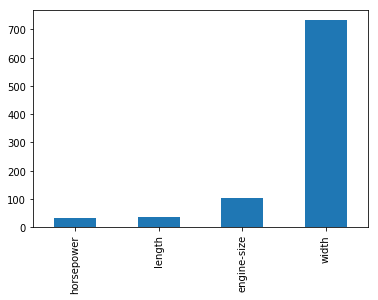

In [89]:
multi_model = LinearRegression()
multi_model.fit(multi_train_x, multi_train_y)
multi_intercept = multi_model.intercept_
multi_coeffs = dict(zip(model_cols, multi_model.coef_))
print(multi_intercept)
print(multi_coeffs)

predictors = [cols for cols in model_cols]

coef = pd.Series(multi_model.coef_, predictors).sort_values()

coef.plot(kind='bar')

In [90]:
# calculate error metrics
multi_train_mae, multi_train_mse, multi_train_r2 = predict_metrics(multi_model, multi_train_x, multi_train_y)
multi_test_mae, multi_test_mse, multi_test_r2 = predict_metrics(multi_model, multi_test_x, multi_test_y)
print('training mean error:', multi_train_mae, 'training mse:', multi_train_mse, 'training r2:', multi_train_r2)
print('test mean error:', multi_test_mae, 'test mse:', multi_test_mse, 'test r2:', multi_test_r2)

training mean error: 2377.2048946506125 training mse: 10544448.28726888 training r2: 0.8296799280737147
test mean error: 2294.755961922607 test mse: 14639446.072886953 test r2: 0.7977532868975479


{'horsepower': 41.02673448393876, 'engine-size': 88.56705969642304, 'length': 56.447619624058085, 'width': 719.8923651143978}


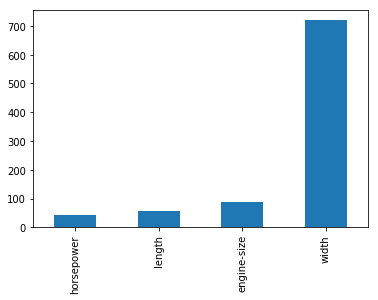

In [92]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha = 0.05, normalize=True)
ridgeReg.fit(multi_train_x, multi_train_y)

coeffs = dict(zip(model_cols, ridgeReg.coef_ ))
print(coeffs)

predictors = [cols for cols in model_cols]

coef = pd.Series(ridgeReg.coef_, predictors).sort_values()

coef.plot(kind='bar')

In [93]:
ridge_train_mae, ridge_train_mse, ridge_train_r2 = predict_metrics(ridgeReg, multi_train_x, multi_train_y)
ridge_test_mae, ridge_test_mse, ridge_test_r2 = predict_metrics(ridgeReg, multi_test_x, multi_test_y)
print('train mae: {} ..... train mse: {} ..... train r2: {}'.format(ridge_train_mae, ridge_train_mse, ridge_train_r2))
print('test mae: {} ..... test mse: {} ..... test r2: {}'.format(ridge_test_mae, ridge_test_mse, ridge_test_r2))
print(ridgeReg.score(multi_test_x, multi_test_y))

train mae: 2381.952434663695 ..... train mse: 10627585.43199435 ..... train r2: 0.8283370484764498
test mae: 2311.378752781822 ..... test mse: 15091271.092743572 ..... test r2: 0.7915112388918728
0.7915112388918728


{'horsepower': 33.205986710935846, 'engine-size': 101.88236166020994, 'length': 37.82617996376422, 'width': 731.711780626894}


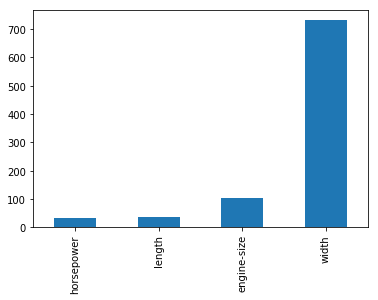

In [111]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.5, normalize=True)
lasso.fit(multi_train_x, multi_train_y)

coeffs = dict(zip(model_cols, lasso.coef_ ))
print(coeffs)

predictors = [cols for cols in model_cols]

coef = pd.Series(lasso.coef_, predictors).sort_values()

coef.plot(kind='bar')

In [112]:
lasso_train_mae, lasso_train_mse, lasso_train_r2 = predict_metrics(lasso, multi_train_x, multi_train_y)
lasso_test_mae, lasso_test_mse, lasso_test_r2 = predict_metrics(lasso, multi_test_x, multi_test_y)
print('train mae: {} ..... train mse: {} ..... train r2: {}'.format(lasso_train_mae, lasso_train_mse, lasso_train_r2))
print('test mae: {} ..... test mse: {} ..... test r2: {}'.format(lasso_test_mae, lasso_test_mse, lasso_test_r2))

train mae: 2376.580476535357 ..... train mse: 10544493.431487575 ..... train r2: 0.8296791988779934
test mae: 2295.120408154451 ..... test mse: 14657193.245905127 ..... test r2: 0.7975081063496011


In [96]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(multi_train_x, multi_train_y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

ridge_regressor.score(multi_test_x, multi_test_y)


{'alpha': 20}
-11680459.801574891


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


-14644896.930401951

In [102]:
lasso = Lasso()

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5 )
lasso_regressor.fit(multi_test_x, multi_test_y)

print(lasso_regressor.best_params_)   # {'alpha': 1}

print(lasso_regressor.best_score_)

lasso_regressor.score(multi_test_x, multi_test_y)

{'alpha': 20}
-11340631.31632509


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211231838.0036771, tolerance: 334878.28054358973
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198301379.75336584, tolerance: 326893.06883589743
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161331239.6097498, tolerance: 321074.0645897436
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130893696.529

-9054733.383040112

In [113]:
print('simple linear regression: {}'.format((test_mae, test_mse))), 
print('multiple linear regression: {}'.format((multi_test_mae, multi_test_mse))) 
print('ridge regression: {} '.format((ridge_test_mae, ridge_test_mse)))      
print('lasso regression: {}'.format((lasso_test_mae, lasso_test_mse)))

simple linear regression: (3350.5364188162926, 23938809.842329077)
multiple linear regression: (2294.755961922607, 14639446.072886953)
ridge regression: (2311.378752781822, 15091271.092743572) 
lasso regression: (2295.120408154451, 14657193.245905127)
